https://plot.ly/python/reference/#layout-updatemenus

In [1]:
import ANEMO.ANEMO as A
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [3]:
time = np.arange(-750, 750, 1)
x=np.arange(len(time))

dir_target, start_anti, latence, v_anti, tau, maxi = 1, 650, 850, 10, 15, 15

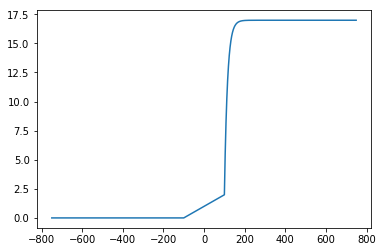

In [4]:
fct = A.Equation.fct_velocity (x=x, start_anti=start_anti, latence=latence, v_anti=v_anti, tau=tau, maxi=maxi, dir_target=dir_target, do_whitening=False)

plt.plot(time, fct)

In [5]:
list_dir_target = [-1,1]

# step 1
list_lat = np.linspace(835, 1500, 5)
list_v_anti = np.linspace(-40, 40, 5)
list_max = np.linspace(1, 40, 5)

# step 2
list_start = np.linspace(250,835, 5)
list_tau = np.linspace(13, 80, 5)

In [6]:
param = dict(x=x,
            start_anti=start_anti,
            latence=latence,
            v_anti=v_anti,
            tau=tau,
            maxi=maxi,
            dir_target=dir_target)


def generat_data(do_whitening=False) :
    
    data = []
    
    for var, liste in zip(['dir_target', 'latence', 'v_anti',  'maxi',  'start_anti', 'tau',],
                          [list_dir_target, list_lat, list_v_anti, list_max, list_start, list_tau]):
        
        for a in range(len(liste)) :
            new_param = param.copy()
            new_param[var] = liste[a]
            new_param['do_whitening']=do_whitening
            data.append(dict(visible=False, line=dict(color='black', width=1),
                             x=time, y=list(A.Equation.fct_velocity(**new_param))))
    
   
    return data

In [7]:
data_false = generat_data(do_whitening=False)
#data_true = generat_data(do_whitening=True)

In [8]:
sliders=[]
d, t = 0, 0

for var, liste in zip(['dir_target', 'latence', 'v_anti',  'maxi',  'start_anti', 'tau',],
                      [list_dir_target, list_lat, list_v_anti, list_max, list_start, list_tau]):
    
    dic = []
    for a in range(len(liste)) :
        di = dict(method = 'restyle', args = ['visible', [False] * len(data_false)],
                     label = str(int(liste[a])))
        di['args'][1][d] = True
        dic.append(di)
        d=d+1
    
    if var in ['latence', 'start_anti'] :
        t=t+50
    
    sliders.append(dict(x=-0.7, y=1.1, ticklen=0, font=dict(size=10),
                        active = len(liste),
                        currentvalue = {"prefix": "%s: "%var, 'font':{'size':15}},
                        pad = {"t": t-10}, len=0.5, steps = dic))
    
    
    t=t+60


layout = go.Layout(title="Fonction Velocity", titlefont={'size':20},
                xaxis=dict(title='Time (ms)', range=[-750, 750], tickfont={'size':10}),
                yaxis=dict(title='Velocity (°/s)',range=[-40, 40], tickfont={'size':10}),
                sliders=sliders,  showlegend=False, font={'size':15})
                


data = data_false #+ data_true

'''vis = [False]+[True]+[False]*(len(data_false)-2)

updatemenus = list([
            dict(type = 'buttons',
                  direction = 'left', x = -0.5, y = 1.1,
                  active=-1, showactive = True,
                  xanchor = 'left', yanchor = 'bottom',
                  buttons=list([
                      dict(label = 'T/F', method = 'restyle',
                           args = [{'visible':vis+vis,
                                    'y': [data[i]['y'] for i in range(len(data))]}]),
                      dict(label = 'False', method = 'restyle',
                           args = [{'visible':vis,
                                    'y': [data_false[i]['y'] for i in range(len(data_false))]}]),
                      dict(label = 'True', method = 'restyle',
                           args=[{'visible':vis,
                                  'y': [data_true[i]['y'] for i in range(len(data_true))]}])]))
        ])


annotations = list([dict(text='do_whitening:', x=-0.7, y=1.1, yref='paper',xref='paper',
                         align='left', yanchor='bottom', showarrow=False, font={'size':15}) ])
layout['updatemenus'] = updatemenus
layout['annotations'] = annotations'''


annotations = list([dict(text='<b>Step 1:</b>', x=-0.70, y=0.8, yref='paper',xref='paper',
                         align='left', yanchor='bottom', showarrow=False, font={'size':17}),
                   dict(text='<b>Step 2:</b>', x=-0.70, y=0.13, yref='paper',xref='paper',
                         align='left', yanchor='bottom', showarrow=False, font={'size':17})])


layout['annotations'] = annotations


fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [9]:
plot(fig, filename='../docs/Fct_velocity.html', auto_open=False)

'file:///home/drone/Bureau/Git/ANEMO/docs/Fct_velocity.html'